In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
data.describe(include = 'all')

C:\Users\Julian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [3]:
for column in data.columns.values.tolist():
    print(column)
    print(data[column].unique())
    print(len(data[column].unique()))
    print("")


SEVERITYCODE
[2 1]
2

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
23564

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
23840

OBJECTID
[     1      2      3 ... 219545 219546 219547]
194673

INCKEY
[  1307  52200  26700 ... 311280 309514 308220]
194673

COLDETKEY
[  1307  52200  26700 ... 312640 310794 309500]
194673

REPORTNO
['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008']
194670

STATUS
['Matched' 'Unmatched']
2

ADDRTYPE
['Intersection' 'Block' 'Alley' nan]
4

INTKEY
[37475.    nan 34387. ... 36056. 38057. 26005.]
7615

LOCATION
['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1']
24103

EXCEPTRSNCODE
[' ' nan 'NEI']
3

EXCEPTRSNDESC
[nan 'Not Enough Information, or Insufficient Location Information']


In [4]:
nan = data.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [5]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE', 'OBJECTID',
           'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 'STATUS',
           'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
           'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE',
           'SEGLANEKEY', 'CROSSWALKKEY', 'PERSONCOUNT', 'VEHCOUNT']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[], 'Freq1':[], 'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in data.columns.values.tolist():
    if column not in exclude:
        for unique in data[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(data[data[column].isin([unique]) & data['SEVERITYCODE'].isin([1])])
            n2 = len(data[data[column].isin([unique]) & data['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [6]:
n2t

58188

In [7]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(daf)
    display(daf[daf['Column'].str.contains('INFL|SPEE|INA')])
    #display(daf[daf['Column'].str.contains('ST_COLDESC') | daf['Column'].str.contains('SDOT_COLDESC')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
113,SPEEDING,NaN,130683.0,54657.0,29.490126,93.931739,28.076313
72,INATTENTIONIND,NaN,117077.0,47791.0,28.987432,82.132055,24.549373
74,UNDERINFL,N,69378.0,30896.0,30.811576,53.096858,15.870717
75,UNDERINFL,0,57693.0,22701.0,28.237182,39.013199,11.661093
73,INATTENTIONIND,Y,19408.0,10397.0,34.883409,17.867945,5.340751
114,SPEEDING,Y,5802.0,3531.0,37.833494,6.068261,1.813811
78,UNDERINFL,Y,3187.0,1939.0,37.826766,3.332302,0.996029
77,UNDERINFL,1,2372.0,1623.0,40.625782,2.789235,0.833706
76,UNDERINFL,NaN,3855.0,1029.0,21.068796,1.768406,0.528579


In [8]:
daf.corr()

,Freq1,Freq2,Per2,Per2T,PerT
Freq1,1.000000,0.966333,-0.147903,0.966333,0.966333
Freq2,0.966333,1.000000,-0.067366,1.000000,1.000000
Per2,-0.147903,-0.067366,1.000000,-0.067366,-0.067366
Per2T,0.966333,1.000000,-0.067366,1.000000,1.000000
PerT,0.966333,1.000000,-0.067366,1.000000,1.000000


In [9]:
out = ['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 
       'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'INCDATE',
       'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY']

for column in data[out].columns.values.tolist():
    print(column)
    print(data[column].unique())
    print(len(data[column].unique()))
    print("")



OBJECTID
[     1      2      3 ... 219545 219546 219547]
194673

INCKEY
[  1307  52200  26700 ... 311280 309514 308220]
194673

COLDETKEY
[  1307  52200  26700 ... 312640 310794 309500]
194673

INTKEY
[37475.    nan 34387. ... 36056. 38057. 26005.]
7615

REPORTNO
['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008']
194670

STATUS
['Matched' 'Unmatched']
2

LOCATION
['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1']
24103

EXCEPTRSNCODE
[' ' nan 'NEI']
3

EXCEPTRSNDESC
[nan 'Not Enough Information, or Insufficient Location Information']
2

SEVERITYCODE.1
[2 1]
2

SEVERITYDESC
['Injury Collision' 'Property Damage Only Collision']
2

COLLISIONTYPE
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
11

PERSONCOUNT
[ 2  4

In [10]:
df = data.drop(out, axis = 1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,0,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,Entering at angle,N
1,1,-122.347294,47.647172,Block,0,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,From same direction - both going straight - bo...,N
2,1,-122.334540,47.607871,Block,0,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,One parked--one moving,N
3,1,-122.334803,47.604803,Block,0,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,From same direction - all others,N
4,2,-122.306426,47.545739,Intersection,0,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,Entering at angle,N


In [11]:
#df.describe(include = 'all')
#df.describe()

In [12]:
df['X'].replace(np.nan, df['X'].mean(), inplace = True)
df['Y'].replace(np.nan, df['Y'].mean(), inplace = True)
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace(['N', '0'], 0, inplace = True)
df['UNDERINFL'].replace(['Y', '1'], 1, inplace = True)
df['WEATHER'].replace(np.nan, 'Unknown', inplace = True)
df['ROADCOND'].replace(np.nan, 'Unknown', inplace = True)
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOURDAY'] = df['INCDTTM'].dt.hour
df['DAYWEEK'] = df['INCDTTM'].dt.dayofweek
df['MONTH'] = df['INCDTTM'].dt.month
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace(['N', '0'], 0, inplace = True)
df['HITPARKEDCAR'].replace(['Y', '1'], 1, inplace = True)
df['ST_COLDESC'].replace(np.nan, 'Not Stated', inplace=True)
df['PEDNUM'] = df['PEDCOUNT']+df['PEDCYLCOUNT']
df.loc[df['PEDNUM'] > 0, 'PEDNUM'] = 1


nan = df.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("")    
    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

ST_COLDESC
False    194673
Name: ST_COLDESC, dtype: int64

HITPARKEDCAR
False    194673
Name: HI

In [13]:
df.drop(['INCDTTM', 'PEDCYLCOUNT', 'PEDCOUNT'], axis = 1, inplace = True)

In [14]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

SEVERITYCODE
[2 1]

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]

ADDRTYPE
['Intersection' 'Block' 'Alley' 'Unknown']

JUNCTIONTYPE
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']

SDOT_COLDESC
['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE'
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE'
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END'
 'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE'
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE'
 'MOTOR VEHICLE STRUCK OBJECT IN ROAD'
 'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT'
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE'
 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END'
 'NOT ENOUGH INFORMATION / NO

In [15]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[],'Freq1':[],'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in df.columns.values.tolist():
    if column not in exclude:
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

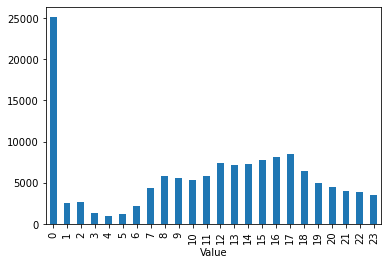

In [16]:
dfh = daf[daf['Column'].str.contains('HOURDAY')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
q = dfh['Freq2']
p.plot(kind = 'bar')

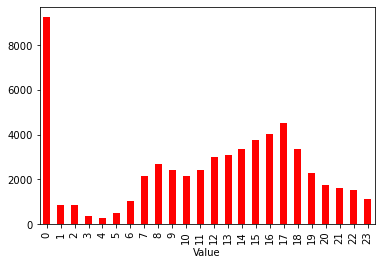

In [17]:
q.plot(kind = 'bar', color = 'r')

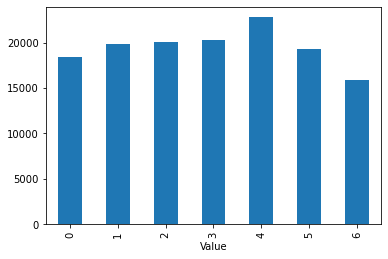

In [18]:
dfh = daf[daf['Column'].str.contains('DAYWEEK')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
q = dfh['Freq2']
p.plot(kind = 'bar')

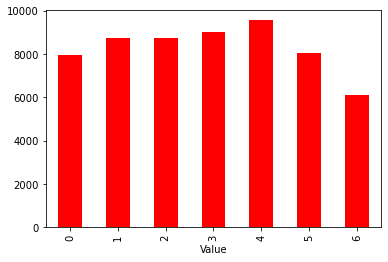

In [19]:
q.plot(kind = 'bar', color = 'r')

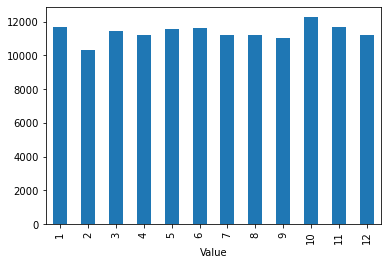

In [20]:
dfh = daf[daf['Column'].str.contains('MONTH')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
q = dfh['Freq1']
q.plot(kind = 'bar')

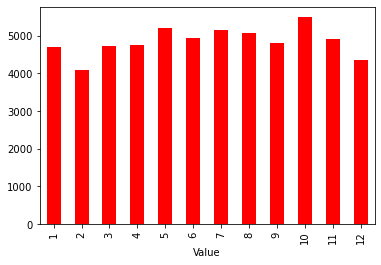

In [21]:
p.plot(kind = 'bar', color = 'r')

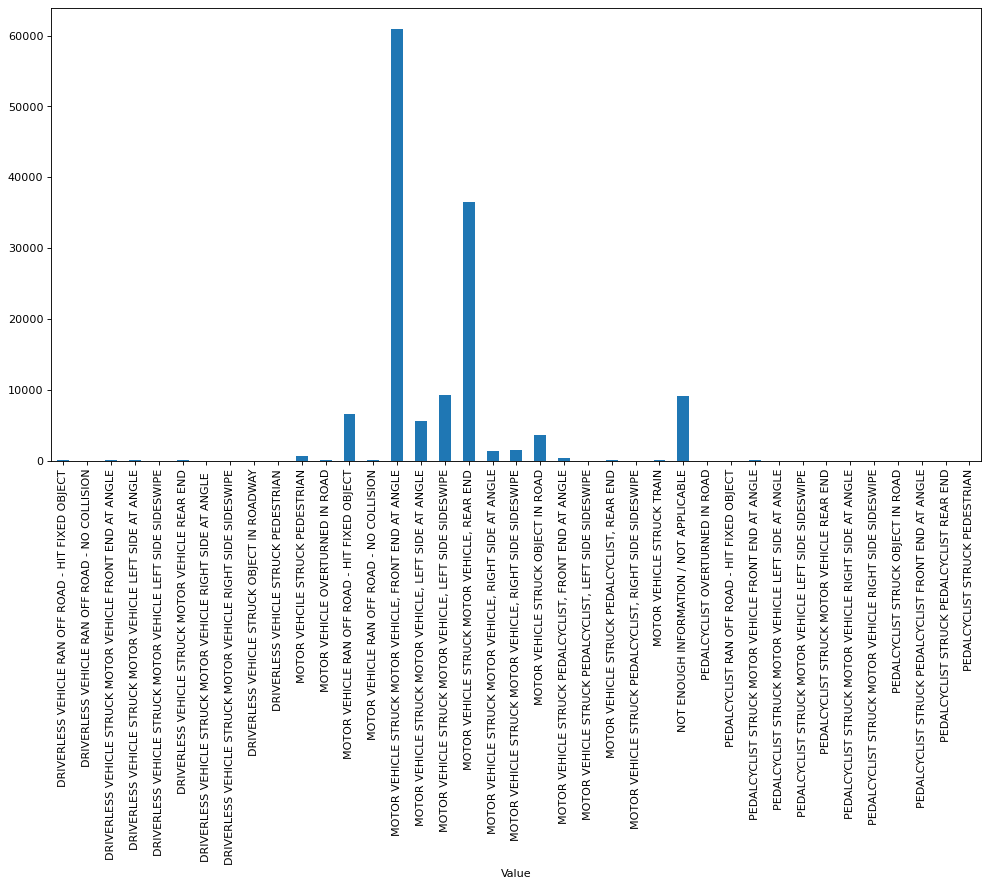

In [22]:
fs = 15
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('SDOT_COLDESC')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
p.plot(kind = 'bar')

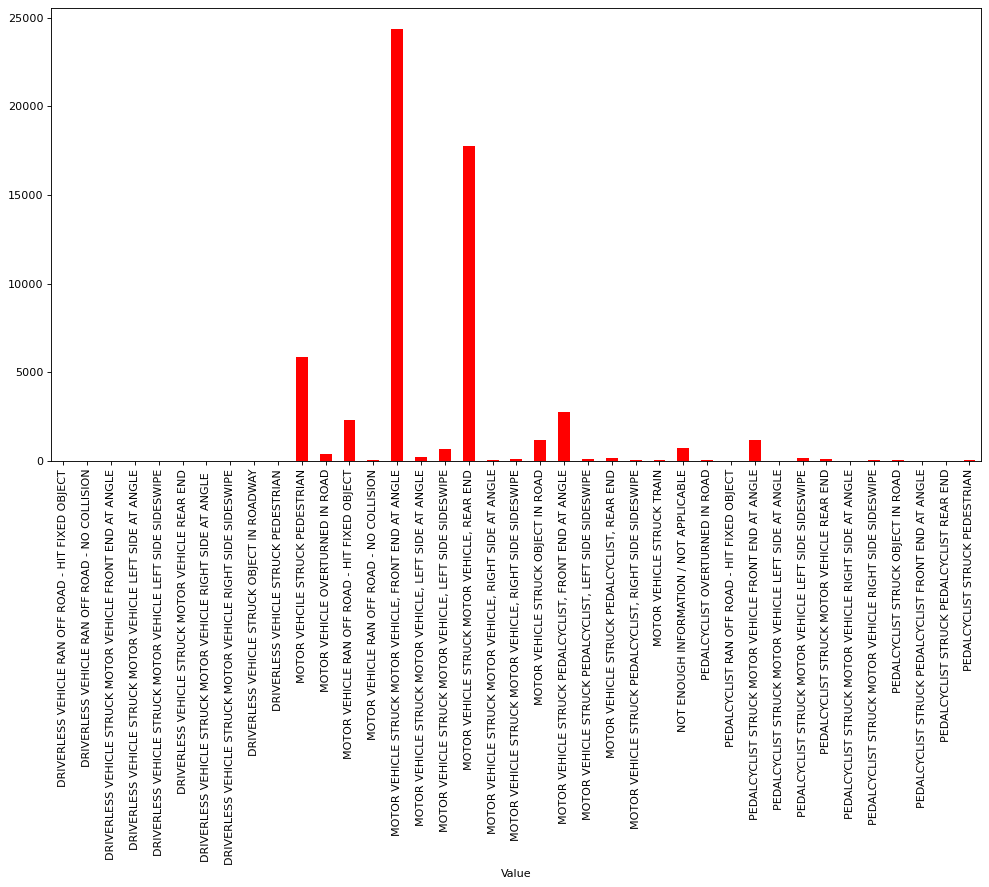

In [23]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('SDOT_COLDESC')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar', color = 'r')

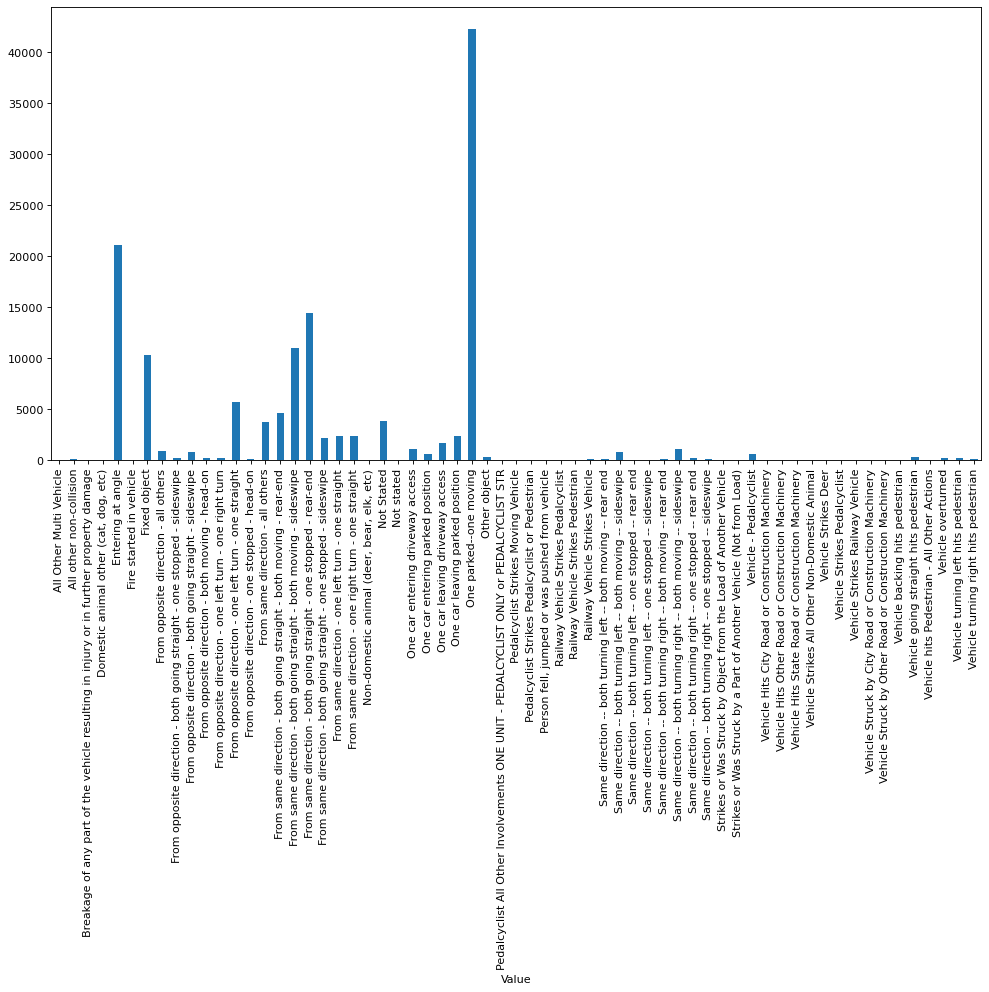

In [24]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('ST_COLDESC')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
p.plot(kind = 'bar')

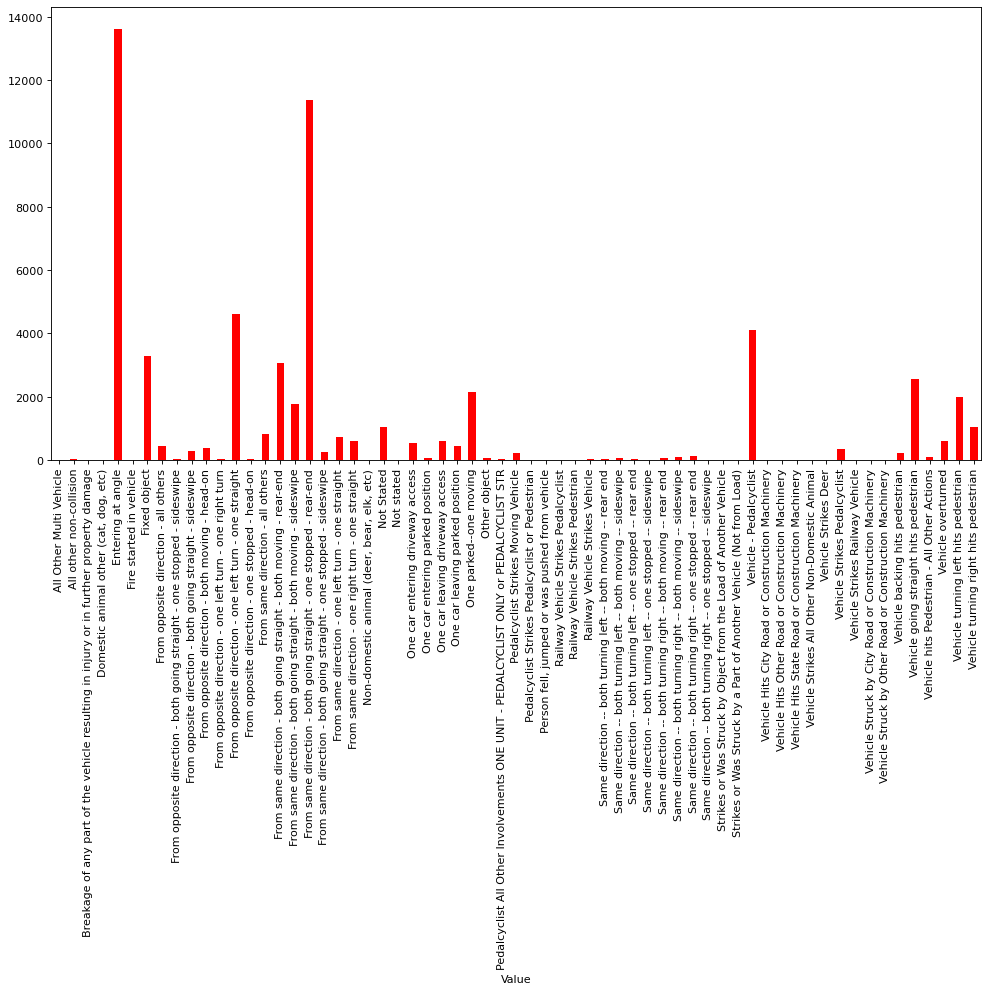

In [25]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('ST_COLDESC')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar', color = 'r')

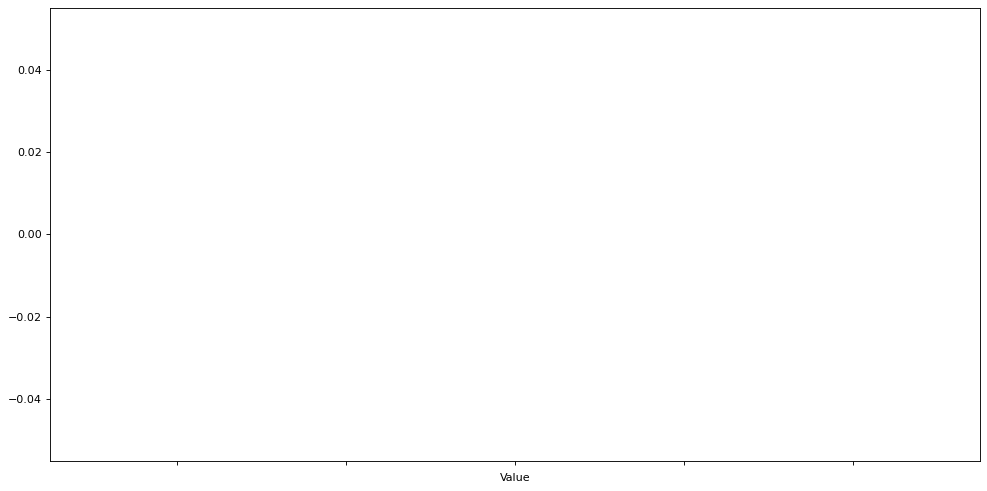

In [26]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('S ')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'line', color = 'r')

In [27]:
df_test = df.groupby(['SEVERITYCODE'])['HOURDAY'].value_counts()

In [28]:
df_sev2 = df[df['SEVERITYCODE'] == 2]
df_sev1 = df[df['SEVERITYCODE'] == 1]
print(len(df_sev2),len(df_sev1))

58188 136485


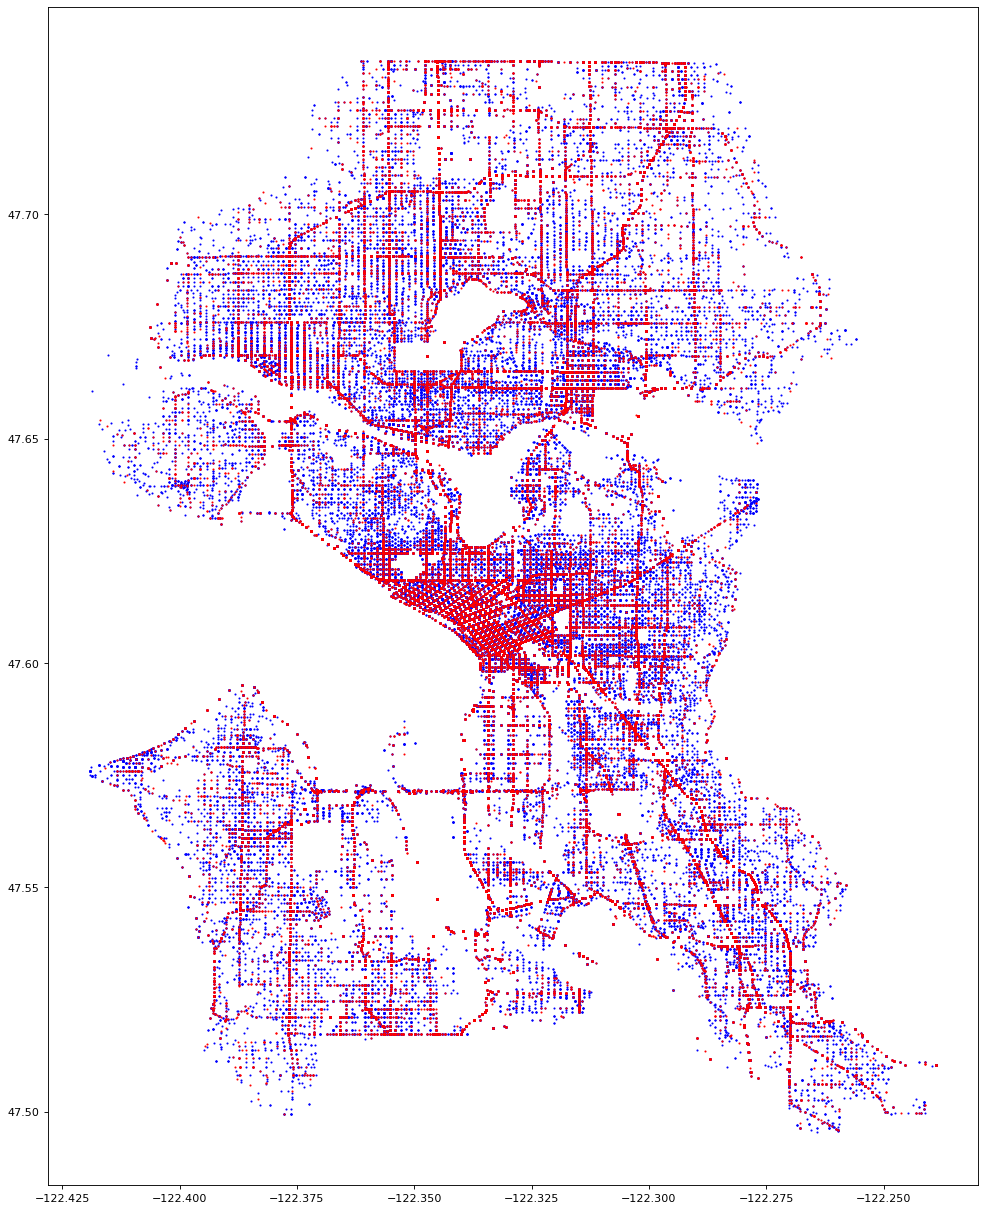

In [29]:
fs = 15
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_sev2['X'], df_sev2['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-30-867739ef4271>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_uin1 = df_sev2[df['UNDERINFL'] == 1]


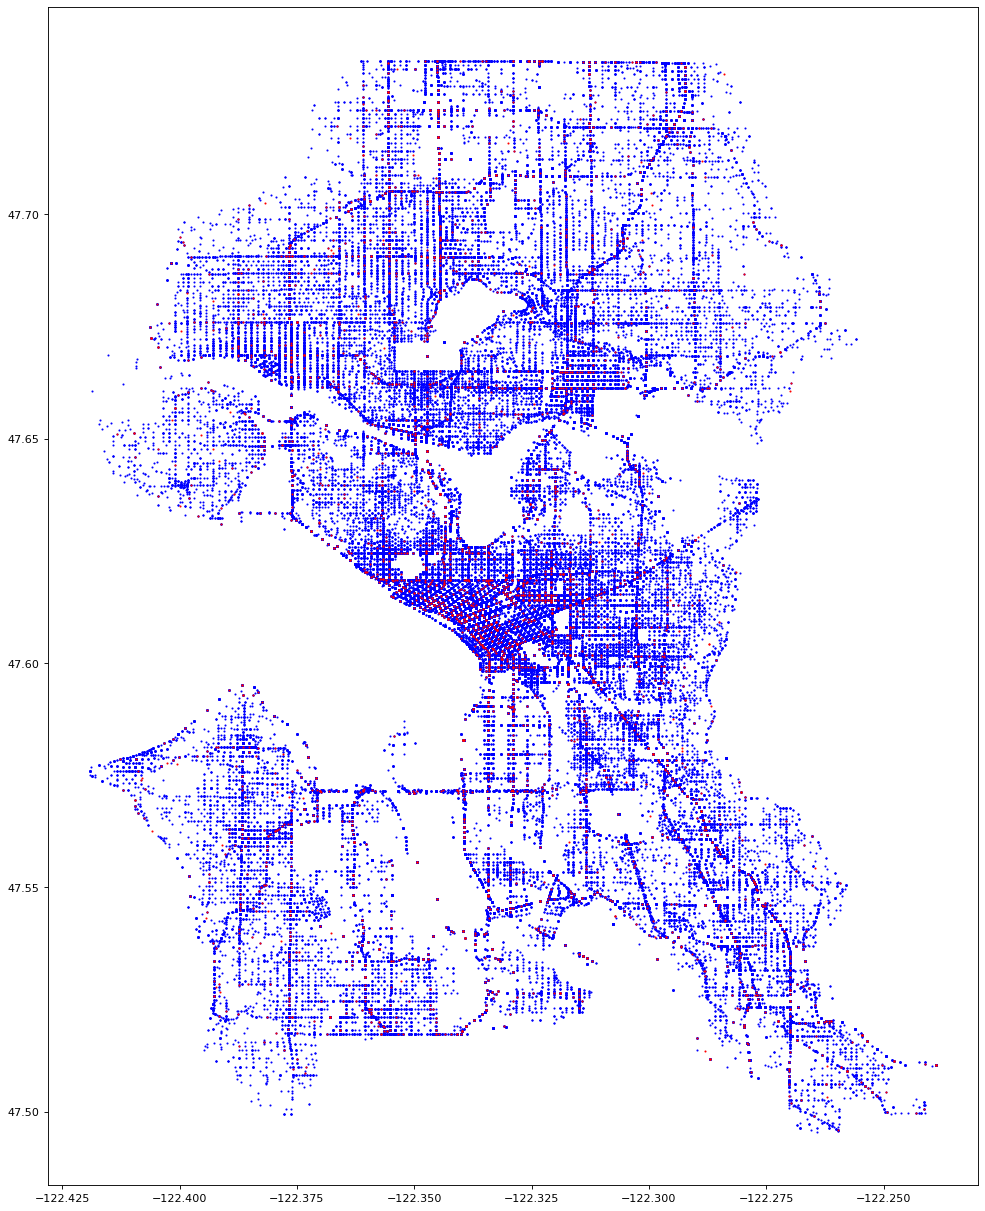

In [30]:
df_uin1 = df_sev2[df['UNDERINFL'] == 1]
df_uin0 = df[df['UNDERINFL'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_uin0['X'], df_uin0['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_uin1['X'], df_uin1['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-31-73405827a06b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iat1 = df_sev2[df['HITPARKEDCAR'] == 1]


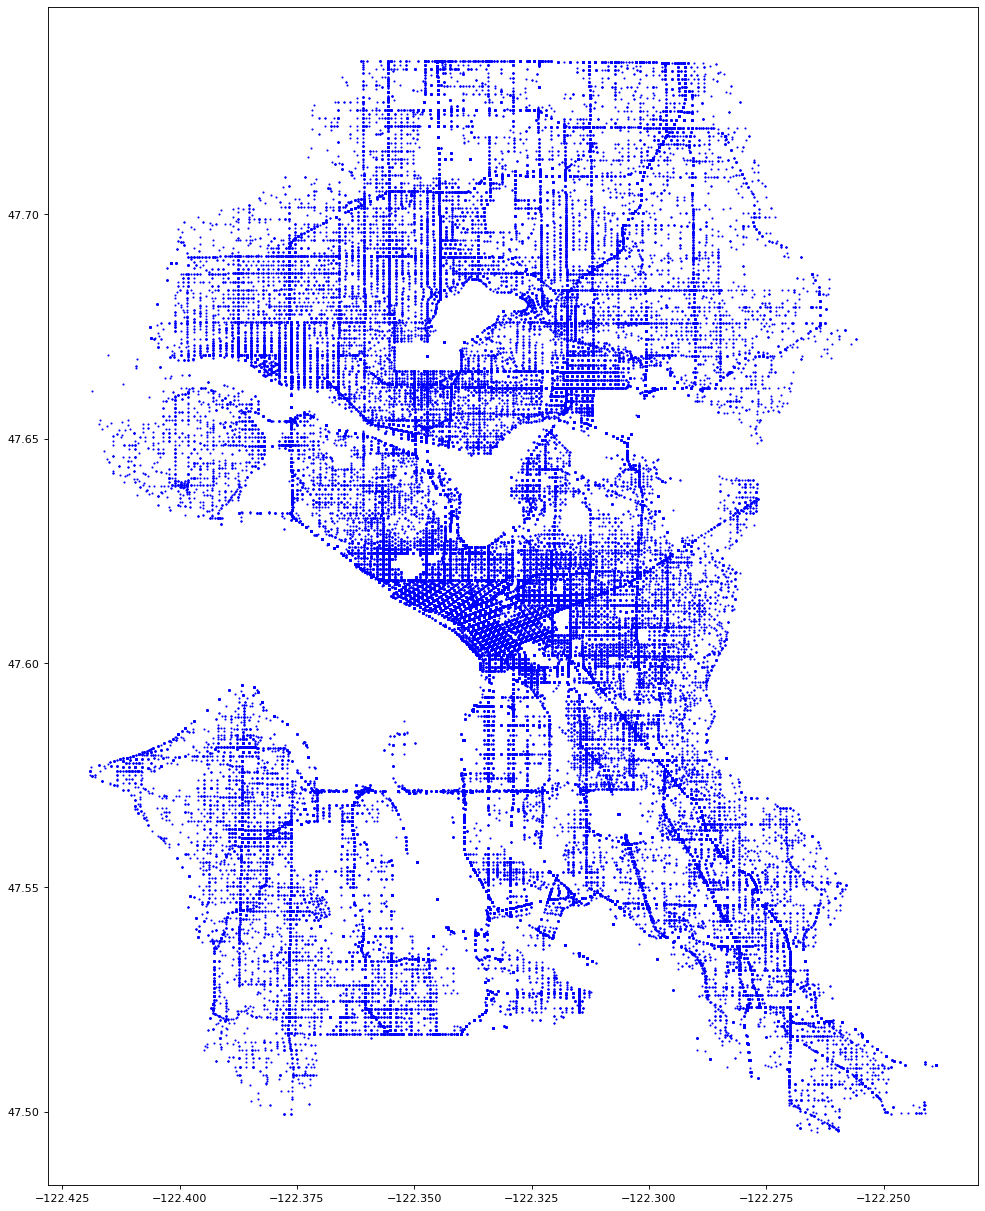

In [31]:
df_iat1 = df_sev2[df['HITPARKEDCAR'] == 1]
df_iat0 = df[df['HITPARKEDCAR'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_iat0['X'], df_iat0['Y'], marker='.', color = 'b', s = 3)
#plt.scatter(df_iat1['X'], df_iat1['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-32-8b6ee9b120ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]


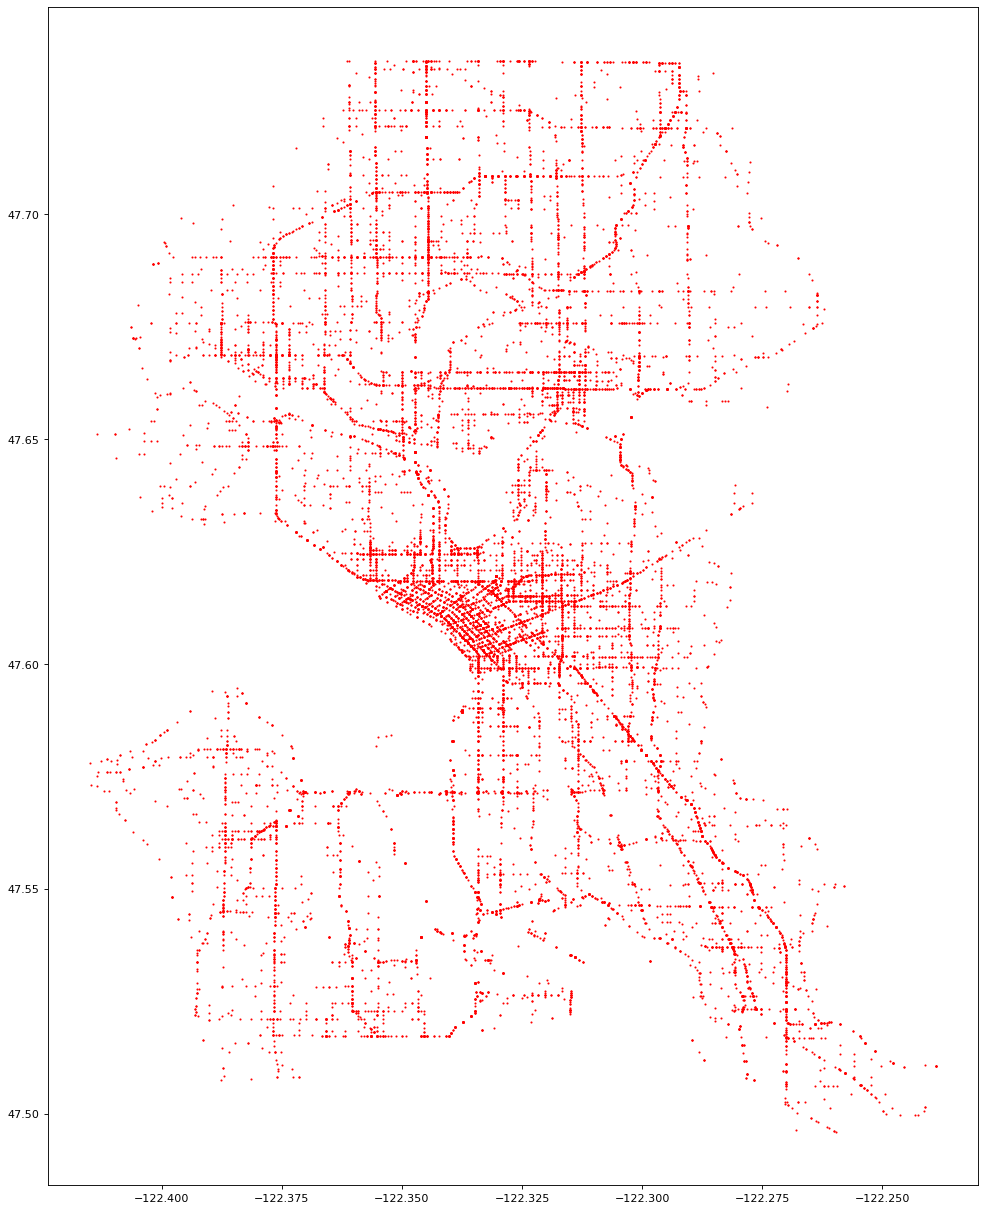

In [32]:
df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-33-a46653a7d0b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark = df_sev2[df['JUNCTIONTYPE'].str.contains('Intersection|Mid-Block')]


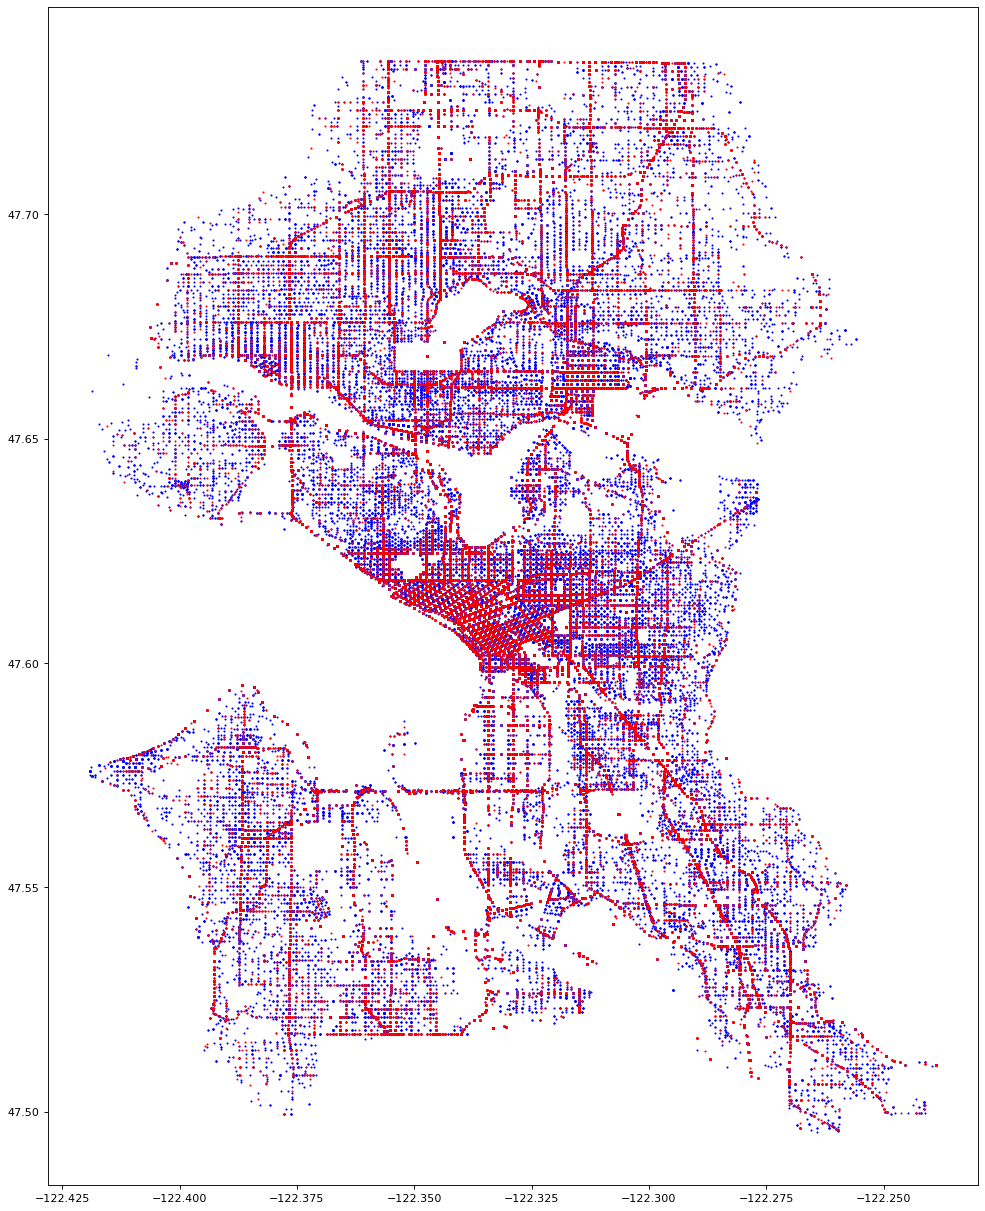

In [33]:
df_dark = df_sev2[df['JUNCTIONTYPE'].str.contains('Intersection|Mid-Block')]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_dark['X'], df_dark['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-34-fb0de0ea1a61>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[df['DAYWEEK'].isin([0,1,2,3,4,5,6])]


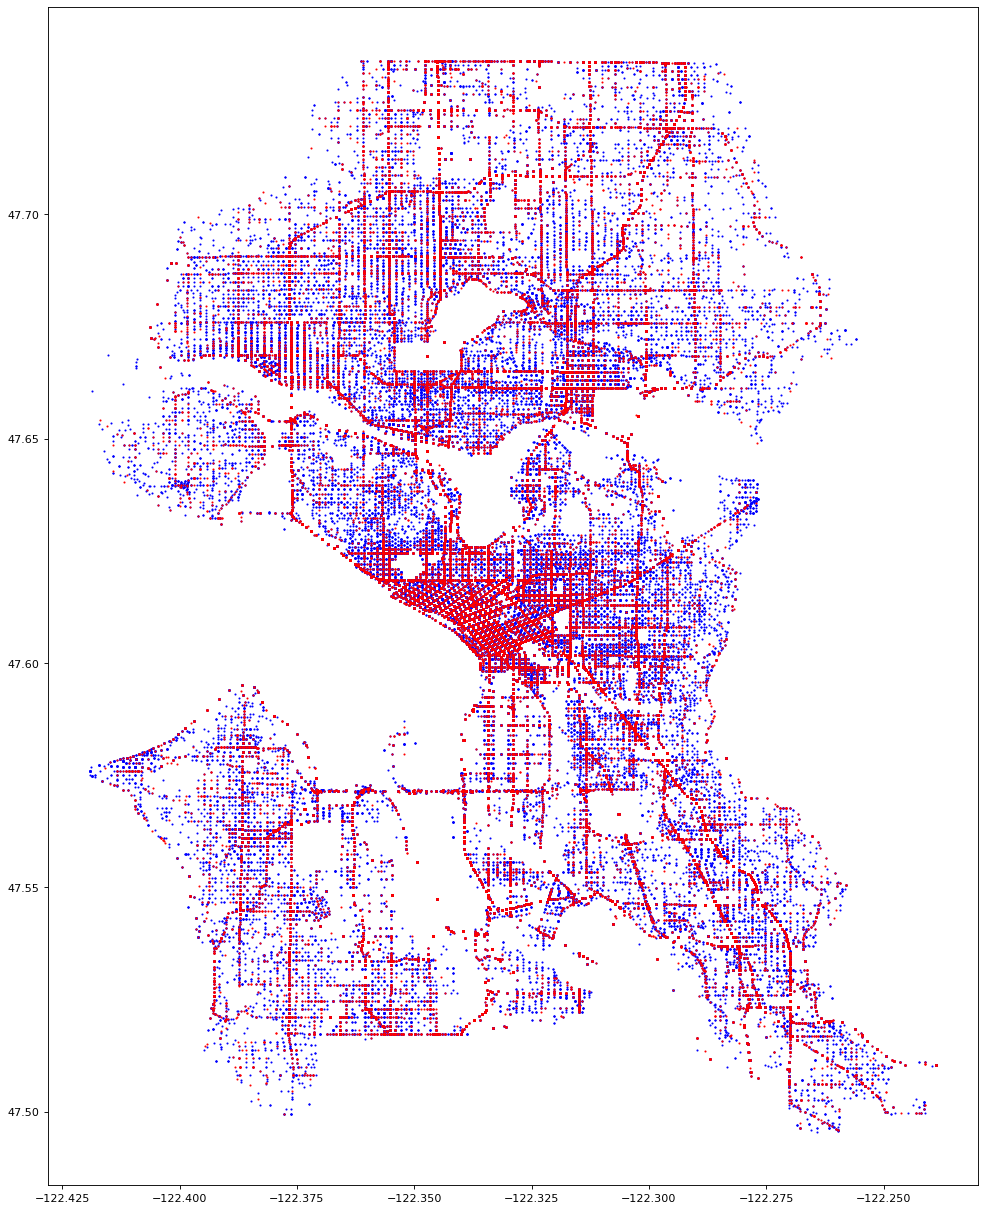

In [34]:
df_dark0 = df_sev2[df['DAYWEEK'].isin([0,1,2,3,4,5,6])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r', s = 3)
plt.show()

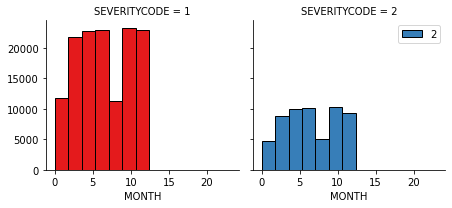

In [35]:
bins=np.linspace(df.HOURDAY.min(), df.HOURDAY.max(), 14)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=5)
g.map(plt.hist, 'MONTH', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [36]:
bins

array([ 0.        ,  1.76923077,  3.53846154,  5.30769231,  7.07692308,
        8.84615385, 10.61538462, 12.38461538, 14.15384615, 15.92307692,
       17.69230769, 19.46153846, 21.23076923, 23.        ])

In [37]:
df.drop(['SDOT_COLDESC', 'ST_COLDESC', 'HITPARKEDCAR'], axis = 1, inplace = True)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'HOURDAY', 'DAYWEEK', 'MONTH', 'PEDNUM'],
      dtype='object')

In [38]:
SeattleXMax = df[['X']].max()
SeattleXMin = df[['X']].min()
SeattleYMax = df[['Y']].max()
SeattleYMin = df[['Y']].min()
SeattleX = np.linspace(SeattleXMin, SeattleXMax, 50)
SeattleY = np.linspace(SeattleYMin, SeattleYMax, 50)
SX, SY = np.meshgrid(SeattleX, SeattleY)
SGrid = pd.DataFrame(np.vstack([SX.ravel(), SY.ravel()]).transpose(), columns = ['X', 'Y'])
len(SGrid)
SGrid.head()

,X,Y
0,-122.419091,47.495573
1,-122.415415,47.495573
2,-122.411738,47.495573
3,-122.408062,47.495573
4,-122.404386,47.495573


In [39]:
def n_prox(coord_df,x,y,epsilon=0.1):
    sorted_df = coord_df.sort_values(by = ['Y', 'X'], ignore_index = True)
    segment = np.linspace(sorted_df['Y'].min(),sorted_df['Y'].max(), 101)    
    k = 0
    for i, value in enumerate(sorted_df['Y']):
        if value >= segment[k] and k < len(segment)-1:
            if value > segment[k]:
                segment[k] = i-1
            else:            
                segment[k] = i
            k += 1

    segment[len(segment)-1]=len(sorted_df)-1
    
    for j, index in enumerate(segment):
        if sorted_df['Y'].iloc[int(index)] > y:
            if j > 0 and j < len(segment):
                j = j-1
            break
    
    if j == len(segment)-1:
        j = len(segment)-2
    
    rangeStart = int(segment[int(j)])
    rangeEnd = int(segment[int(j+1)]) if j < len(segment)-1 else int(len(sorted_df)-1)    
    
    n = 0
    for i in range(rangeStart,rangeEnd):
        if sorted_df.iloc[i,0] < x+2*epsilon and sorted_df.iloc[i,0] > x-2*epsilon and sorted_df.iloc[i,1] < y+3*epsilon and sorted_df.iloc[i,1] > y-3*epsilon:
            distance = ((sorted_df.iloc[i,0]-x)**2 + (sorted_df.iloc[i,1]-y)**2)**(0.5)
            if distance < epsilon:
                n += 1
    return n        

In [40]:
SeattleINATTENTIONIND = df[df['INATTENTIONIND'].isin([1]) & df['SEVERITYCODE'].isin([1])]
Sxy = SeattleINATTENTIONIND[['X', 'Y']]
Sxy = Sxy.reset_index(drop = True)
Sxy
#Sxy = Sxy.append(SGrid,  ignore_index=True)
#figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(Sxy['X'], Sxy['Y'], s = 3)

,X,Y
0,-122.318169,47.615837
1,-122.408105,47.576818
2,-122.333271,47.576651
3,-122.314869,47.613625
4,-122.363032,47.548385
...,...,...
19403,-122.356709,47.624583
19404,-122.317228,47.598338
19405,-122.344516,47.689474
19406,-122.335527,47.617434


In [41]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(SGrid)):
    n.append(n_prox(Sxy, SGrid['X'].iloc[i], SGrid['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

43

In [42]:
m = list(map(lambda x: True if x > 2 else False,n))
S = SGrid[m]

In [43]:
len(m)

2500

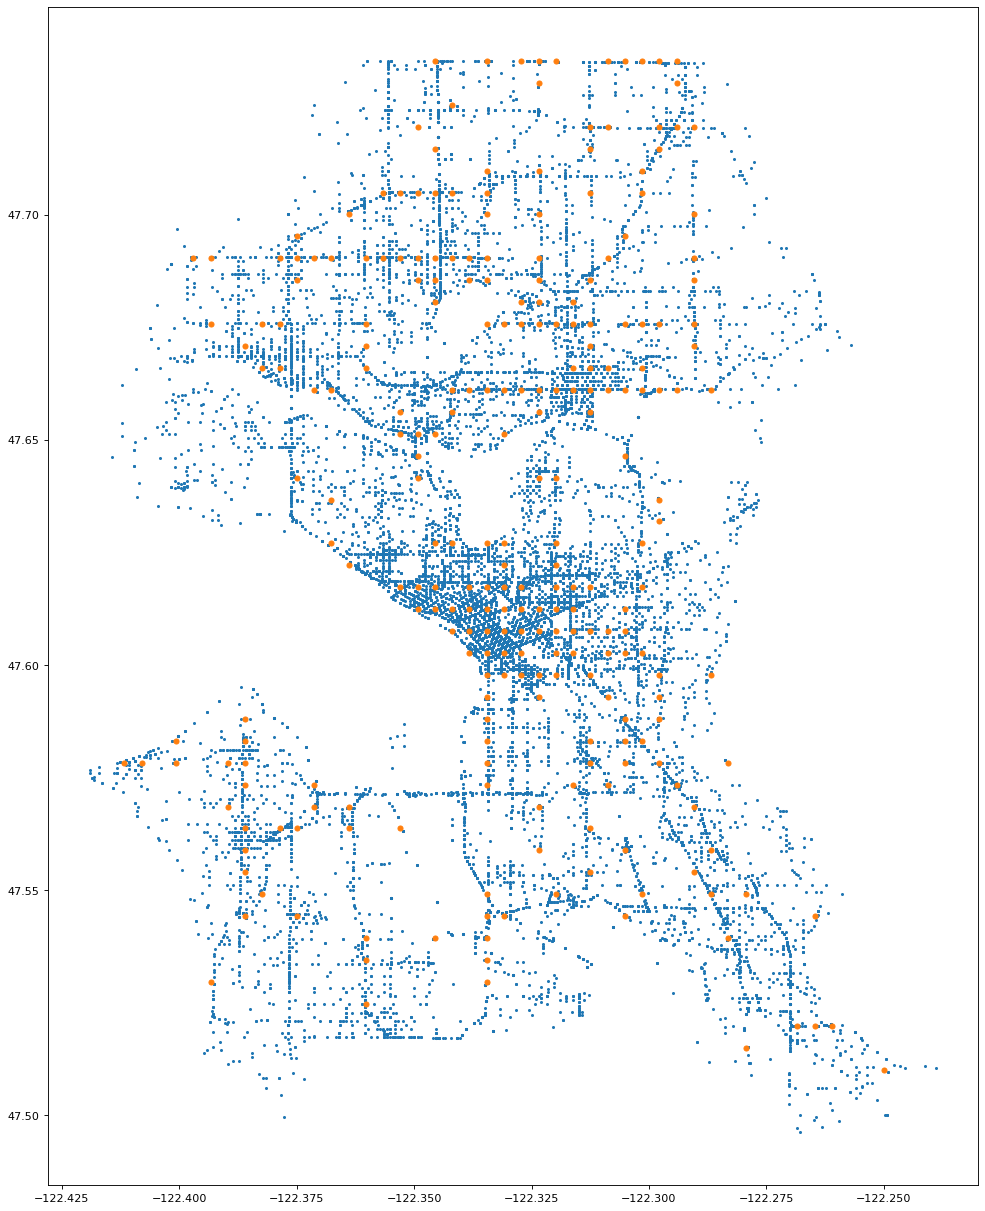

In [44]:
# Plot the points with colors
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Sxy['X'], Sxy['Y'], s = 3)
plt.scatter(S['X'], S['Y'], s = 20)

In [45]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ADDRTYPE')])
    #display(daf[daf['Column'].str.contains('ST_COLCODE') | daf['Column'].str.contains('SDOT_COLCODE')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
1,ADDRTYPE,Block,96830.0,30096.0,23.711454,51.722005,15.459771
0,ADDRTYPE,Intersection,37251.0,27819.0,42.752420,47.808827,14.290117
3,ADDRTYPE,Unknown,1735.0,191.0,9.916926,0.328246,0.098113
2,ADDRTYPE,Alley,669.0,82.0,10.918775,0.140923,0.042122


In [46]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('JUNCTIONTYPE')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
4,JUNCTIONTYPE,At Intersection (intersection related),35636.0,27174.0,43.263811,46.700351,13.958792
5,JUNCTIONTYPE,Mid-Block (not related to intersection),70396.0,19404.0,21.608018,33.347082,9.967484
7,JUNCTIONTYPE,Mid-Block (but intersection related),15493.0,7297.0,32.018429,12.540386,3.748337
6,JUNCTIONTYPE,Driveway Junction,7437.0,3234.0,30.306438,5.557847,1.661247
8,JUNCTIONTYPE,At Intersection (but not related to intersection),1475.0,623.0,29.694948,1.070667,0.320024
9,JUNCTIONTYPE,Unknown,5936.0,402.0,6.342695,0.690864,0.206500
10,JUNCTIONTYPE,Ramp Junction,112.0,54.0,32.530120,0.092803,0.027739


In [47]:
df['WEATHER'][df['WEATHER'].str.contains('Overcast|Fog')] = 'Low Visibility'
df['WEATHER'][df['WEATHER'].str.contains('Snowing|Hail')] = 'Low Temperatures'
df['WEATHER'][df['WEATHER'].str.contains('Blowing|Crosswind')] = 'Wind Related'
df['WEATHER'][~df['WEATHER'].str.contains('Clear|Raining|Low|Wind')] = 'Other'
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('WEATHER')])

<ipython-input-47-c8d22e2782c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][df['WEATHER'].str.contains('Overcast|Fog')] = 'Low Visibility'
<ipython-input-47-c8d22e2782c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][df['WEATHER'].str.contains('Snowing|Hail')] = 'Low Temperatures'
<ipython-input-47-c8d22e2782c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][df['WEATHER'].str.contains

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
56,WEATHER,Clear,75295.0,35840.0,32.249066,61.593456,18.410360
55,WEATHER,Raining,21969.0,11176.0,33.718510,19.206709,5.740909
54,WEATHER,Overcast,18969.0,8745.0,31.554449,15.028872,4.492148
57,WEATHER,Unknown,18272.0,1900.0,9.418997,3.265278,0.975996
60,WEATHER,Fog/Smog/Smoke,382.0,187.0,32.864675,0.321372,0.096059
59,WEATHER,Snowing,736.0,171.0,18.853363,0.293875,0.087840
58,WEATHER,Other,716.0,116.0,13.942308,0.199354,0.059587
61,WEATHER,Sleet/Hail/Freezing Rain,85.0,28.0,24.778761,0.048120,0.014383
62,WEATHER,Blowing Sand/Dirt,41.0,15.0,26.785714,0.025779,0.007705
63,WEATHER,Severe Crosswind,18.0,7.0,28.000000,0.012030,0.003596


In [48]:
df['ROADCOND'][df['ROADCOND'].str.contains('Ice|Snow')] = 'Ice-Snow-Slush'
df['ROADCOND'][df['ROADCOND'].str.contains('Water|Wet')] = 'Wet-StandingWater'
df['ROADCOND'][df['ROADCOND'].str.contains('Oil|Sand|Other')] = 'Oil-Sand-Mud-Dirt-Other'
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ROADCOND')])

<ipython-input-48-1ecb4e78544a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains('Ice|Snow')] = 'Ice-Snow-Slush'
<ipython-input-48-1ecb4e78544a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains('Water|Wet')] = 'Wet-StandingWater'
<ipython-input-48-1ecb4e78544a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
66,ROADCOND,Dry,84446.0,40064.0,32.177335,68.852684,20.580152
65,ROADCOND,Wet,31719.0,15755.0,33.186586,27.076029,8.093059
67,ROADCOND,Unknown,18281.0,1809.0,9.004480,3.108888,0.929251
69,ROADCOND,Ice,936.0,273.0,22.580645,0.469169,0.140235
68,ROADCOND,Snow/Slush,837.0,167.0,16.633466,0.287001,0.085785
70,ROADCOND,Other,89.0,43.0,32.575758,0.073898,0.022088
72,ROADCOND,Standing Water,85.0,30.0,26.086957,0.051557,0.015410
73,ROADCOND,Oil,40.0,24.0,37.500000,0.041246,0.012328
71,ROADCOND,Sand/Mud/Dirt,52.0,23.0,30.666667,0.039527,0.011815


In [49]:
df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dark')] = 'Dark'
df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dusk|Dawn')] = 'Dusk-Dawn'
df['LIGHTCOND'].replace('Unknown','Other', inplace = True)
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('LIGHTCOND')])

<ipython-input-49-4e1d33d33384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dark')] = 'Dark'
<ipython-input-49-4e1d33d33384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dusk|Dawn')] = 'Dusk-Dawn'


,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
74,LIGHTCOND,Daylight,77593.0,38544.0,33.188390,66.240462,19.799356
75,LIGHTCOND,Dark - Street Lights On,34032.0,14475.0,29.841054,24.876263,7.435546
78,LIGHTCOND,Dusk,3958.0,1944.0,32.937987,3.340895,0.998598
77,LIGHTCOND,Unknown,16948.0,1695.0,9.091884,2.912972,0.870691
79,LIGHTCOND,Dawn,1678.0,824.0,32.933653,1.416100,0.423274
76,LIGHTCOND,Dark - No Street Lights,1203.0,334.0,21.730644,0.574002,0.171570
80,LIGHTCOND,Dark - Street Lights Off,883.0,316.0,26.355296,0.543067,0.162323
81,LIGHTCOND,Other,183.0,52.0,22.127660,0.089366,0.026711
82,LIGHTCOND,Dark - Unknown Lighting,7.0,4.0,36.363636,0.006874,0.002055


In [50]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[],'Freq1':[],'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in df.columns.values.tolist():
    if column not in exclude:
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [51]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('PEDNUM|PEDROWNOTGRNT|PERCYCLCOUNT')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
30,PEDROWNOTGRNT,0,136025.0,53981.0,28.410155,92.769987,27.729064
77,PEDNUM,0,135111.0,47232.0,25.902831,81.171376,24.262224
78,PEDNUM,1,1374.0,10956.0,88.856448,18.828624,5.627899
31,PEDROWNOTGRNT,1,460.0,4207.0,90.143561,7.230013,2.161060


In [52]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('INFL|INNATENTION|SPEEDING')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
32,SPEEDING,0,130683.0,54657.0,29.490126,93.931739,28.076313
13,UNDERINFL,0,130926.0,54626.0,29.439726,93.878463,28.060388
14,UNDERINFL,1,5559.0,3562.0,39.052735,6.121537,1.829735
33,SPEEDING,1,5802.0,3531.0,37.833494,6.068261,1.813811


In [53]:
df['SEVERITYCODE'].replace([2,1],[1,0], inplace = True)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM
0,1,-122.323148,47.703140,Intersection,At Intersection (intersection related),0,0,Low Visibility,Wet-StandingWater,Daylight,0,0,14,2,3,0
1,0,-122.347294,47.647172,Block,Mid-Block (not related to intersection),0,0,Raining,Wet-StandingWater,Dark,0,0,18,2,12,0
2,0,-122.334540,47.607871,Block,Mid-Block (not related to intersection),0,0,Low Visibility,Dry,Daylight,0,0,10,3,11,0
3,0,-122.334803,47.604803,Block,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,9,4,3,0
4,1,-122.306426,47.545739,Intersection,At Intersection (intersection related),0,0,Raining,Wet-StandingWater,Daylight,0,0,8,2,1,0


In [54]:
df['HOURDAY'] = df['HOURDAY']/df['HOURDAY'].max()
df['DAYWEEK'] = df['DAYWEEK']/df['DAYWEEK'].max()
df['MONTH'] = df['MONTH']/df['MONTH'].max()

In [55]:
X = df[['X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HOURDAY', 'DAYWEEK', 'MONTH', 'PEDNUM']]
y = df[['SEVERITYCODE']]

In [56]:
X.head()

,X,Y,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM
0,-122.323148,47.703140,Intersection,At Intersection (intersection related),0,0,Low Visibility,Wet-StandingWater,Daylight,0,0,0.608696,0.333333,0.250000,0
1,-122.347294,47.647172,Block,Mid-Block (not related to intersection),0,0,Raining,Wet-StandingWater,Dark,0,0,0.782609,0.333333,1.000000,0
2,-122.334540,47.607871,Block,Mid-Block (not related to intersection),0,0,Low Visibility,Dry,Daylight,0,0,0.434783,0.500000,0.916667,0
3,-122.334803,47.604803,Block,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0.391304,0.666667,0.250000,0
4,-122.306426,47.545739,Intersection,At Intersection (intersection related),0,0,Raining,Wet-StandingWater,Daylight,0,0,0.347826,0.333333,0.083333,0


In [57]:
dummies = ['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
X = pd.concat([X,pd.get_dummies(df[dummies])], axis = 1)
X.drop(dummies, axis = 1, inplace = True)
#junc_df = pd.get_dummies(df['JUNCTIONTYPE'])
#weat_df = pd.get_dummies(df['WEATHER'])
#road_df = pd.get_dummies(df['ROADCOND'])
#ligh_df = pd.get_dummies(df['LIGHTCOND'])
X.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
0,-122.323148,47.703140,0,0,0,0,0.608696,0.333333,0.250000,0,...,0,0,0,0,0,1,0,1,0,0
1,-122.347294,47.647172,0,0,0,0,0.782609,0.333333,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
2,-122.334540,47.607871,0,0,0,0,0.434783,0.500000,0.916667,0,...,0,1,0,0,0,0,0,1,0,0
3,-122.334803,47.604803,0,0,0,0,0.391304,0.666667,0.250000,0,...,0,1,0,0,0,0,0,1,0,0
4,-122.306426,47.545739,0,0,0,0,0.347826,0.333333,0.083333,0,...,0,0,0,0,0,1,0,1,0,0


In [58]:
risk_areas = ['INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SPEEDING', 'PEDNUM']

In [59]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM
0,1,-122.323148,47.703140,Intersection,At Intersection (intersection related),0,0,Low Visibility,Wet-StandingWater,Daylight,0,0,0.608696,0.333333,0.250000,0
1,0,-122.347294,47.647172,Block,Mid-Block (not related to intersection),0,0,Raining,Wet-StandingWater,Dark,0,0,0.782609,0.333333,1.000000,0
2,0,-122.334540,47.607871,Block,Mid-Block (not related to intersection),0,0,Low Visibility,Dry,Daylight,0,0,0.434783,0.500000,0.916667,0
3,0,-122.334803,47.604803,Block,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0.391304,0.666667,0.250000,0
4,1,-122.306426,47.545739,Intersection,At Intersection (intersection related),0,0,Raining,Wet-StandingWater,Daylight,0,0,0.347826,0.333333,0.083333,0


In [143]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=5)

In [144]:
coordX_mean = X_train['X'].mean()
coordX_std = X_train['X'].std()
coordY_mean = X_train['Y'].mean()
coordY_std = X_train['Y'].std()
X_train.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
112031,-122.355434,47.620936,0,0,0,0,0.608696,0.666667,0.666667,0,...,0,1,0,0,0,0,0,1,0,0
134420,-122.331077,47.623121,0,0,0,0,0.782609,0.333333,0.833333,0,...,0,1,0,0,0,0,0,1,0,0
69262,-122.329678,47.599198,0,0,0,0,0.652174,0.500000,0.416667,0,...,0,1,0,0,0,0,0,1,0,0
15648,-122.352907,47.517347,0,0,0,0,0.695652,0.500000,0.416667,0,...,0,0,0,0,0,1,0,1,0,0
103813,-122.335228,47.606104,0,0,0,0,0.782609,0.500000,0.416667,0,...,0,1,0,0,0,0,0,1,0,0


In [145]:
other_risk_areas = X_other[risk_areas]
X_other.drop(risk_areas, axis = 1, inplace = True)

C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
other_risk_areas.head()

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,PEDNUM
69852,0,0,0,0,0
127886,0,0,0,0,0
56522,0,0,0,0,0
154670,0,0,0,0,0
12533,0,1,0,0,0


In [64]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head()
TrainINATTENTIONIND = df_train[df_train['INATTENTIONIND'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainINATTENTIONIND = TrainINATTENTIONIND[['X', 'Y']]
TrainUNDERINFL = df_train[df_train['UNDERINFL'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainUNDERINFL = TrainUNDERINFL[['X', 'Y']]
TrainPEDROWNOTGRNT = df_train[df_train['PEDROWNOTGRNT'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainPEDROWNOTGRNT = TrainPEDROWNOTGRNT[['X', 'Y']]
TrainSPEEDING = df_train[df_train['SPEEDING'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainSPEEDING = TrainUNDERINFL[['X', 'Y']]
TrainPEDNUM = df_train[df_train['PEDNUM'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainPEDNUM = TrainUNDERINFL[['X', 'Y']]

#Sxy = SeattleINATTENTIONIND[['X', 'Y']]
#Sxy = Sxy.reset_index(drop = True)
#Sxy

In [65]:
import datetime
a = datetime.datetime.now()
INATTENTIONINDn = []
for i in range(len(X_other)):
    INATTENTIONINDn.append(n_prox(TrainINATTENTIONIND, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

640

In [66]:
a = datetime.datetime.now()
UNDERINFLn = []
for i in range(len(X_other)):
    UNDERINFLn.append(n_prox(TrainUNDERINFL, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

333

In [67]:
a = datetime.datetime.now()
PEDROWNOTGRNTn = []
for i in range(len(X_other)):
    PEDROWNOTGRNTn.append(n_prox(TrainPEDROWNOTGRNT, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

353

In [68]:
a = datetime.datetime.now()
SPEEDINGn = []
for i in range(len(X_other)):
    SPEEDINGn.append(n_prox(TrainSPEEDING, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

363

In [69]:
a = datetime.datetime.now()
PEDNUMn = []
for i in range(len(X_other)):
    PEDNUMn.append(n_prox(TrainPEDNUM, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

395

In [70]:
crw = 1
X_other['INATTENTIONIND'] = list(map(lambda x: 1 if x > crw else 0,INATTENTIONINDn))
X_other['UNDERINFL'] = list(map(lambda x: 1 if x > crw else 0,UNDERINFLn))
X_other['PEDROWNOTGRNT'] = list(map(lambda x: 1 if x > crw else 0,PEDROWNOTGRNTn))
X_other['SPEEDING'] = list(map(lambda x: 1 if x > crw else 0,SPEEDINGn))
X_other['PEDNUM'] = list(map(lambda x: 1 if x > crw else 0,PEDNUMn))

X_other.head()

<ipython-input-70-7f89a45582b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['INATTENTIONIND'] = list(map(lambda x: 1 if x > crw else 0,INATTENTIONINDn))
<ipython-input-70-7f89a45582b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['UNDERINFL'] = list(map(lambda x: 1 if x > crw else 0,UNDERINFLn))
<ipython-input-70-7f89a45582b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,X,Y,HOURDAY,DAYWEEK,MONTH,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),...,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,PEDNUM
69852,-122.381651,47.552036,0.695652,0.000000,0.833333,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
127886,-122.293643,47.721985,0.260870,0.833333,0.250000,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,1
56522,-122.382523,47.574379,0.000000,0.500000,0.583333,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
154670,-122.373587,47.650346,0.739130,0.666667,0.333333,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12533,-122.296318,47.623065,0.956522,1.000000,0.666667,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


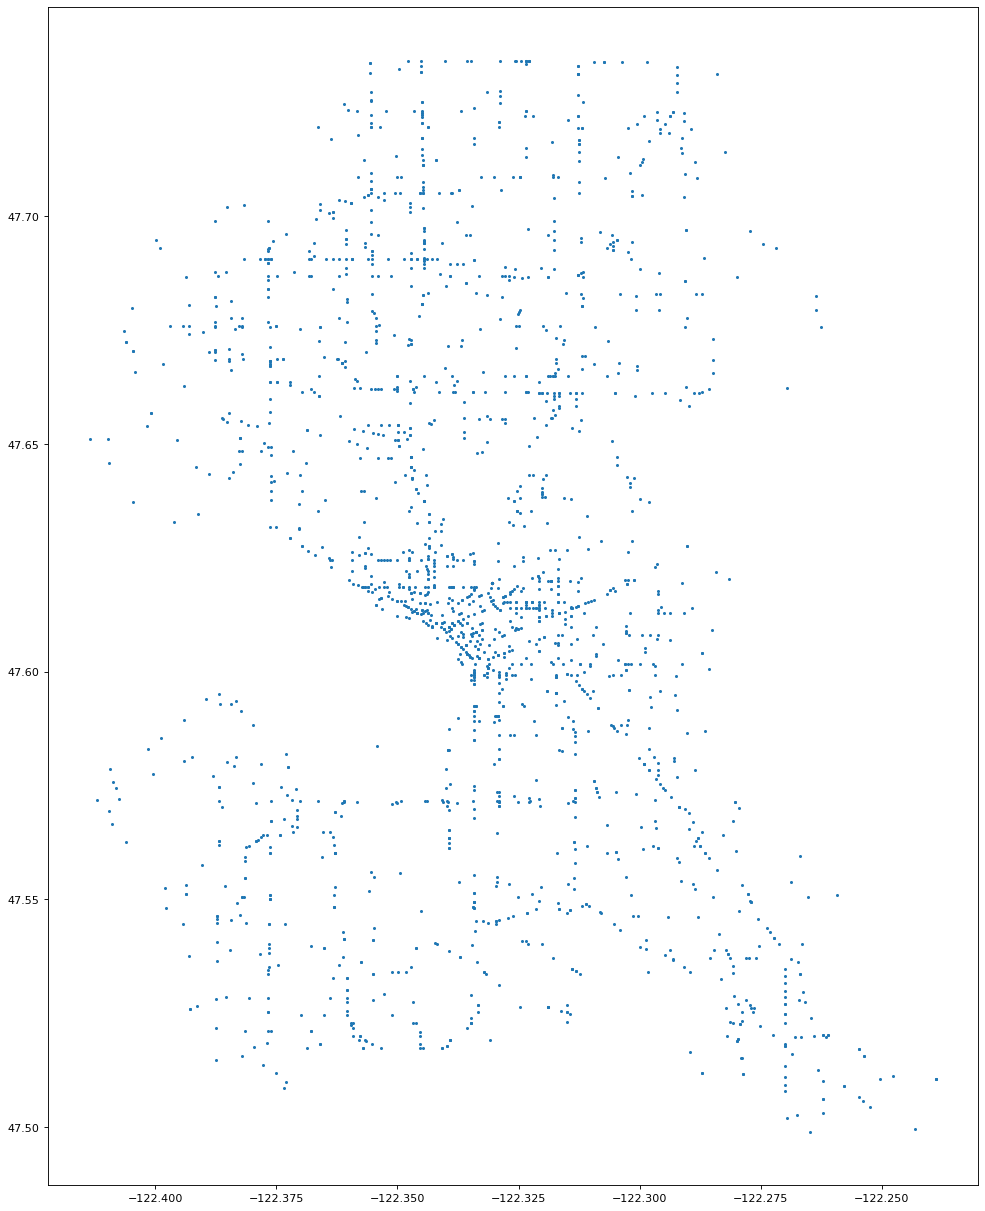

In [71]:
S = TrainPEDNUM
# Plot the points with colors
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(S['X'], S['Y'], s = 3)

In [72]:
X_other.head()

,X,Y,HOURDAY,DAYWEEK,MONTH,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),...,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,PEDNUM
69852,-122.381651,47.552036,0.695652,0.000000,0.833333,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
127886,-122.293643,47.721985,0.260870,0.833333,0.250000,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,1
56522,-122.382523,47.574379,0.000000,0.500000,0.583333,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
154670,-122.373587,47.650346,0.739130,0.666667,0.333333,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12533,-122.296318,47.623065,0.956522,1.000000,0.666667,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [73]:
X_other = X_other.reindex(columns = X_train.columns)
X_other.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
69852,-122.381651,47.552036,1,0,0,0,0.695652,0.000000,0.833333,0,...,0,1,0,0,0,0,0,1,0,0
127886,-122.293643,47.721985,0,1,0,1,0.260870,0.833333,0.250000,1,...,0,1,0,0,0,0,1,0,0,0
56522,-122.382523,47.574379,0,0,0,0,0.000000,0.500000,0.583333,0,...,0,1,0,0,0,0,0,0,1,0
154670,-122.373587,47.650346,0,0,0,0,0.739130,0.666667,0.333333,0,...,0,1,0,0,0,0,0,1,0,0
12533,-122.296318,47.623065,1,0,1,0,0.956522,1.000000,0.666667,0,...,0,1,0,0,0,0,1,0,0,0


In [147]:

X_train.drop(risk_areas, axis = 1, inplace = True)
X_train.head()

C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X,Y,HOURDAY,DAYWEEK,MONTH,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
112031,-122.355434,47.620936,0.608696,0.666667,0.666667,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
134420,-122.331077,47.623121,0.782609,0.333333,0.833333,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
69262,-122.329678,47.599198,0.652174,0.500000,0.416667,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
15648,-122.352907,47.517347,0.695652,0.500000,0.416667,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
103813,-122.335228,47.606104,0.782609,0.500000,0.416667,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [148]:
X_other.head()

,X,Y,HOURDAY,DAYWEEK,MONTH,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
69852,-122.381651,47.552036,0.695652,0.000000,0.833333,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
127886,-122.293643,47.721985,0.260870,0.833333,0.250000,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
56522,-122.382523,47.574379,0.000000,0.500000,0.583333,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
154670,-122.373587,47.650346,0.739130,0.666667,0.333333,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
12533,-122.296318,47.623065,0.956522,1.000000,0.666667,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [149]:
X_train['X'] = (X_train['X']-coordX_mean)/coordX_std
X_train['Y'] = (X_train['Y']-coordY_mean)/coordY_std
X_other['X'] = (X_other['X']-coordX_mean)/coordX_std
X_other['Y'] = (X_other['Y']-coordY_mean)/coordY_std

<ipython-input-149-faf2b6521c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['X'] = (X_train['X']-coordX_mean)/coordX_std
<ipython-input-149-faf2b6521c61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Y'] = (X_train['Y']-coordY_mean)/coordY_std
<ipython-input-149-faf2b6521c61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [164]:
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=5)

In [165]:
X_test.head()

,X,Y,HOURDAY,DAYWEEK,MONTH,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
168536,-0.210593,-1.440889,0.565217,0.166667,0.500000,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
107422,0.817696,-0.367986,0.869565,0.666667,0.500000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
133030,-0.431928,-0.148112,0.347826,0.333333,0.583333,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
48726,1.607077,0.811483,0.304348,0.666667,0.166667,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3672,-1.551355,-1.236861,0.913043,0.500000,0.333333,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [152]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().ravel()
X_cv = X_cv.to_numpy()
y_cv = y_cv.to_numpy().ravel()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().ravel()

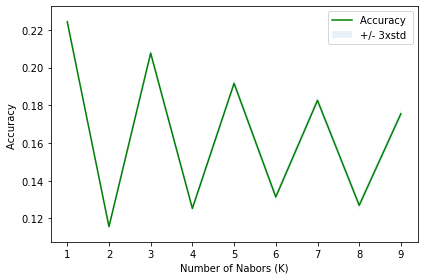

The best accuracy was with 0.22425474254742547 with k= 1


In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatKNN=neigh.predict(X_cv)
    mean_acc[n-1] = jaccard_score(y_cv, yhatKNN)    
    std_acc[n-1]=np.std(yhatKNN==y_cv)/np.sqrt(yhatKNN.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhatKNN = neigh.predict(X_train)
print("Jaccard Index: ", jaccard_score(y_train, yhatKNN))
print(classification_report(y_train, yhatKNN))
print("F1 Score: ", f1_score(y_train, yhatKNN, average='weighted'))

Jaccard Index:  0.9936610830656264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82047
           1       1.00      1.00      1.00     34756

    accuracy                           1.00    116803
   macro avg       1.00      1.00      1.00    116803
weighted avg       1.00      1.00      1.00    116803

F1 Score:  0.9981078860819526


In [155]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhatKNN = neigh.predict(X_test)
print("Jaccard Index: ", jaccard_score(y_test, yhatKNN))
print(classification_report(y_test, yhatKNN))
print("F1 Score: ", f1_score(y_test, neigh.predict(X_test), average='weighted'))

Jaccard Index:  0.21733465367175692
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     27224
           1       0.36      0.36      0.36     11711

    accuracy                           0.61     38935
   macro avg       0.54      0.54      0.54     38935
weighted avg       0.61      0.61      0.61     38935

F1 Score:  0.6139991682113279


In [156]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy") # max_depth = 14
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_cv)
print("Jaccard Index: ", jaccard_score(y_cv, loanTree.predict(X_cv)))
print(classification_report(y_cv, predTree))
print("F1 Score: ", f1_score(y_cv, neigh.predict(X_cv), average='weighted'))

Jaccard Index:  0.2298078909316257
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     27214
           1       0.37      0.38      0.37     11721

    accuracy                           0.62     38935
   macro avg       0.55      0.55      0.55     38935
weighted avg       0.62      0.62      0.62     38935

F1 Score:  0.6179226412865315


In [157]:
from sklearn import svm
C = [1]
mean_acc = np.zeros(len(C))
std_acc = np.zeros(len(C))
for idx, penalty in enumerate(C):
    loanSVM = svm.SVC(kernel='poly', C = penalty, gamma = 'auto').fit(X_train,y_train)
    yhatSVM = loanSVM.predict(X_cv)
    mean_acc[idx] = jaccard_score(y_cv, yhatSVM)
    std_acc[idx]=np.std(yhatSVM==y_cv)/np.sqrt(yhatSVM.shape[0])

mean_acc

array([0.])

In [158]:
print("Jaccard Index: ", jaccard_score(y_cv, loanSVM.predict(X_cv)))
print(classification_report(y_cv, yhatSVM))
print("F1 Score: ", f1_score(y_cv, yhatSVM, average='weighted'))

Jaccard Index:  0.0
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     27214
           1       0.00      0.00      0.00     11721

    accuracy                           0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.49      0.70      0.58     38935



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score:  0.6179226412865315


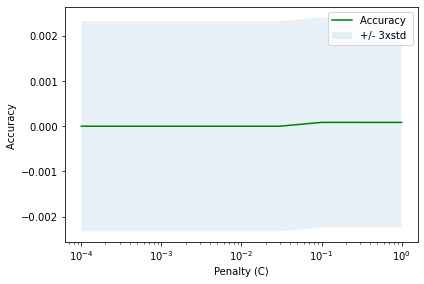

The best accuracy was with 8.530239699735562e-05 with C= 0.1


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
C = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
mean_acc = np.zeros(len(C))
std_acc = np.zeros(len(C))
for idx, penalty in enumerate(C):
    LR = LogisticRegression(C=penalty, solver='liblinear').fit(X_train,y_train)
    yhatLR = LR.predict(X_cv)
    mean_acc[idx] = jaccard_score(y_cv, yhatLR)
    std_acc[idx]=np.std(yhatLR==y_cv)/np.sqrt(yhatLR.shape[0])

mean_acc

yhat_prob = LR.predict_proba(X_cv)

plt.plot(C,mean_acc,'g')
plt.fill_between(C,mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Penalty (C)')
plt.tight_layout()
plt.xscale('log')
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with C=", C[mean_acc.argmax()]) 

In [160]:
LR = LogisticRegression(C=penalty, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_cv)
yhat_prob = LR.predict_proba(X_cv)
print("Jaccard Index: ", jaccard_score(y_cv, yhatLR))
print("Log Loss: ", log_loss(y_cv, yhat_prob))
print(classification_report(y_cv, yhatLR))
print("F1 Score: ", f1_score(y_cv, yhatLR, average='weighted'))

Jaccard Index:  8.528057308545113e-05
Log Loss:  0.572523787455664
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     27214
           1       0.17      0.00      0.00     11721

    accuracy                           0.70     38935
   macro avg       0.43      0.50      0.41     38935
weighted avg       0.54      0.70      0.58     38935

F1 Score:  0.575108333925182


In [162]:
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print("Jaccard Index: ", jaccard_score(y_test, yhatLR))
print("Log Loss: ", log_loss(y_test, yhat_prob))
print("F1 Score: ", f1_score(y_test, yhatLR, average='weighted'))
print(classification_report(y_test, yhatLR))

Jaccard Index:  0.0
Log Loss:  0.5781741086813394
F1 Score:  0.5754462398882917
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     27224
           1       0.00      0.00      0.00     11711

    accuracy                           0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.49      0.70      0.58     38935



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
import folium
# create map and display it
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

# display the map of San Francisco
seattle_map

In [88]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for i in range(len(df)):
    clr = 'blue'
    if df.iloc[i, 0] == 2:
        clr = 'red'
        incidents.add_child(
            folium.features.CircleMarker(
                [df.iloc[i, 2], df.iloc[i, 1]],
                radius=0.1, # define how big you want the circle markers to be
                color=clr,
                fill=True,
                fill_color=clr,
                fill_opacity=0.6
            )
    )

In [89]:
seattle_map.add_child(incidents)

In [90]:
incidents  = 0
seattle_map = 0

In [91]:
print("Jaccard Index: ", jaccard_score(y_cv, loanTree.predict(X_cv)))
print(classification_report(y_cv, predTree))
print("F1 Score: ", f1_score(y_cv, neigh.predict(X_cv), average='weighted'))

Jaccard Index:  0.24399788936768974
              precision    recall  f1-score   support

           0       0.72      0.60      0.65     27214
           1       0.33      0.47      0.39     11721

    accuracy                           0.56     38935
   macro avg       0.53      0.53      0.52     38935
weighted avg       0.61      0.56      0.57     38935

F1 Score:  0.593748247570784


In [92]:
other_risk_areas.head()

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,PEDNUM
69852,0,0,0,0,0
127886,0,0,0,0,0
56522,0,0,0,0,0
154670,0,0,0,0,0
12533,0,1,0,0,0


In [93]:
X_other.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
69852,-1.731790,-1.219120,1,0,0,0,0.695652,0.000000,0.833333,0,...,0,1,0,0,0,0,0,1,0,0
127886,1.248206,1.844275,0,1,0,1,0.260870,0.833333,0.250000,1,...,0,1,0,0,0,0,1,0,0,0
56522,-1.761313,-0.816372,0,0,0,0,0.000000,0.500000,0.583333,0,...,0,1,0,0,0,0,0,0,1,0
154670,-1.458724,0.552953,0,0,0,0,0.739130,0.666667,0.333333,0,...,0,1,0,0,0,0,0,1,0,0
12533,1.157623,0.061206,1,0,1,0,0.956522,1.000000,0.666667,0,...,0,1,0,0,0,0,1,0,0,0


In [94]:
print("Jaccard Index: ", jaccard_score(other_risk_areas['INATTENTIONIND'], X_other['INATTENTIONIND']))
print(classification_report(other_risk_areas['INATTENTIONIND'], X_other['INATTENTIONIND']))
print("F1 Score: ", f1_score(other_risk_areas['INATTENTIONIND'], X_other['INATTENTIONIND'], average='weighted'))

Jaccard Index:  0.14644343094895182
              precision    recall  f1-score   support

           0       0.86      0.42      0.57     65999
           1       0.16      0.62      0.26     11871

    accuracy                           0.45     77870
   macro avg       0.51      0.52      0.41     77870
weighted avg       0.75      0.45      0.52     77870

F1 Score:  0.5190603271210692


In [95]:
print("Jaccard Index: ", jaccard_score(other_risk_areas['UNDERINFL'], X_other['UNDERINFL']))
print(classification_report(other_risk_areas['UNDERINFL'], X_other['UNDERINFL']))
print("F1 Score: ", f1_score(other_risk_areas['UNDERINFL'], X_other['UNDERINFL'], average='weighted'))

Jaccard Index:  0.0428589705317924
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     74214
           1       0.05      0.27      0.08      3656

    accuracy                           0.71     77870
   macro avg       0.50      0.50      0.46     77870
weighted avg       0.91      0.71      0.79     77870

F1 Score:  0.7939803520187513


In [96]:
print("Jaccard Index: ", jaccard_score(other_risk_areas['PEDROWNOTGRNT'], X_other['PEDROWNOTGRNT']))
print(classification_report(other_risk_areas['PEDROWNOTGRNT'], X_other['PEDROWNOTGRNT']))
print("F1 Score: ", f1_score(other_risk_areas['PEDROWNOTGRNT'], X_other['PEDROWNOTGRNT'], average='weighted'))

Jaccard Index:  0.039698149560470436
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     75984
           1       0.04      0.52      0.08      1886

    accuracy                           0.69     77870
   macro avg       0.51      0.61      0.45     77870
weighted avg       0.96      0.69      0.80     77870

F1 Score:  0.7978320632473326


In [97]:
print("Jaccard Index: ", jaccard_score(other_risk_areas['SPEEDING'], X_other['SPEEDING']))
print(classification_report(other_risk_areas['SPEEDING'], X_other['SPEEDING']))
print("F1 Score: ", f1_score(other_risk_areas['SPEEDING'], X_other['SPEEDING'], average='weighted'))

Jaccard Index:  0.04293905287746868
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     74112
           1       0.05      0.27      0.08      3758

    accuracy                           0.71     77870
   macro avg       0.50      0.50      0.46     77870
weighted avg       0.91      0.71      0.79     77870

F1 Score:  0.7922297199195544


In [111]:
X_other.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
69852,-1.731790,-1.219120,1,0,0,0,0.695652,0.000000,0.833333,0,...,0,1,0,0,0,0,0,1,0,0
127886,1.248206,1.844275,0,1,0,1,0.260870,0.833333,0.250000,1,...,0,1,0,0,0,0,1,0,0,0
56522,-1.761313,-0.816372,0,0,0,0,0.000000,0.500000,0.583333,0,...,0,1,0,0,0,0,0,0,1,0
154670,-1.458724,0.552953,0,0,0,0,0.739130,0.666667,0.333333,0,...,0,1,0,0,0,0,0,1,0,0
12533,1.157623,0.061206,1,0,1,0,0.956522,1.000000,0.666667,0,...,0,1,0,0,0,0,1,0,0,0


In [112]:
other_risk_areas.head()

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,PEDNUM
69852,0,0,0,0,0
127886,0,0,0,0,0
56522,0,0,0,0,0
154670,0,0,0,0,0
12533,0,1,0,0,0


In [185]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 14) # max_depth = 14
loanTree.fit(X_other,other_risk_areas['PEDNUM'])
predTree = loanTree.predict(X_other)
print("Jaccard Index: ", jaccard_score(other_risk_areas['PEDNUM'], predTree))
print(classification_report(other_risk_areas['PEDNUM'], predTree))
print("F1 Score: ", f1_score(other_risk_areas['PEDNUM'], predTree, average='weighted'))

Jaccard Index:  0.19320351279114165
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     72847
           1       0.82      0.20      0.32      5023

    accuracy                           0.95     77870
   macro avg       0.89      0.60      0.65     77870
weighted avg       0.94      0.95      0.93     77870

F1 Score:  0.9299384067686903
